**DIGIT RECOGNITION USING MNIST DATASET**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [37]:
mnist = tf.keras.datasets.mnist


In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [40]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [41]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [42]:
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [43]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


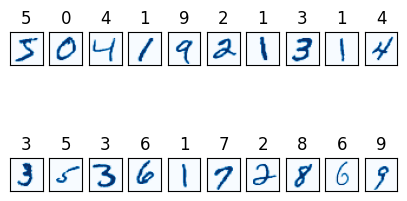

In [44]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [45]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


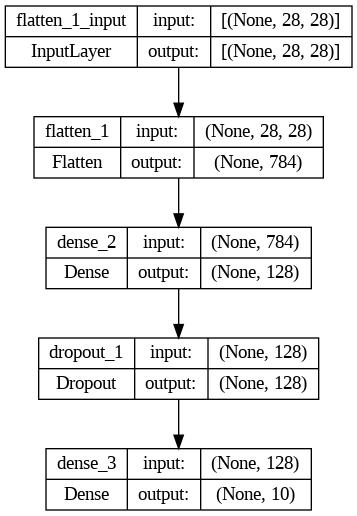

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [49]:
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.13014555,  0.04054074,  0.47919744,  0.37496436, -0.05445924,
         0.67600036,  0.00611421,  0.45831096, -0.00679184,  0.36623546]],
      dtype=float32)

In [50]:
tf.nn.softmax(prediction).numpy()

array([[0.08637813, 0.07897487, 0.12246025, 0.11033855, 0.07181761,
        0.14909585, 0.0763023 , 0.11992901, 0.07532387, 0.1093796 ]],
      dtype=float32)

In [51]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [52]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1449 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0758 - accuracy: 0.9761


In [53]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0797 - accuracy: 0.9760 - 617ms/epoch - 2ms/step


[0.07973093539476395, 0.9760000109672546]

In [54]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.5753363e-09, 1.7286049e-09, 7.9664351e-06, 7.3938718e-05,
        7.6095689e-13, 3.9411518e-08, 4.9653659e-16, 9.9991786e-01,
        9.7697118e-08, 1.4976831e-07],
       [2.5706208e-07, 2.8166707e-04, 9.9923444e-01, 4.2862521e-04,
        4.0862221e-14, 1.2097662e-05, 7.0541887e-08, 2.3463213e-12,
        4.2940235e-05, 4.4829263e-14],
       [1.6014077e-06, 9.9773175e-01, 1.6746492e-04, 3.0270541e-05,
        3.8733656e-06, 3.4991206e-06, 1.0110644e-05, 1.9809713e-03,
        7.0130394e-05, 3.5610654e-07],
       [9.9762779e-01, 1.2068756e-09, 1.0206568e-04, 1.2623408e-06,
        1.8285732e-06, 9.0907663e-05, 2.1080247e-03, 6.4136773e-05,
        1.1393835e-07, 3.9879465e-06],
       [6.1336355e-06, 1.0476253e-10, 4.0798545e-06, 8.3684473e-09,
        9.9054199e-01, 5.2461210e-08, 4.4991493e-06, 3.7378492e-04,
        8.8986650e-07, 9.0685580e-03]], dtype=float32)>

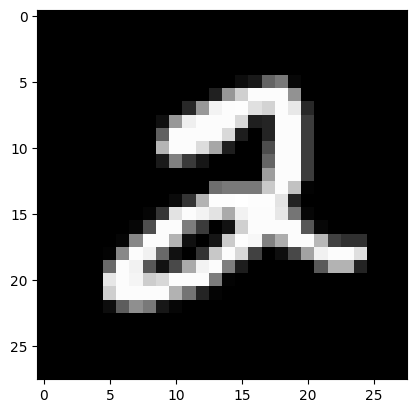

In [55]:
img = x_train[5]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [56]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 53ms/step
predicted : 2
